(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


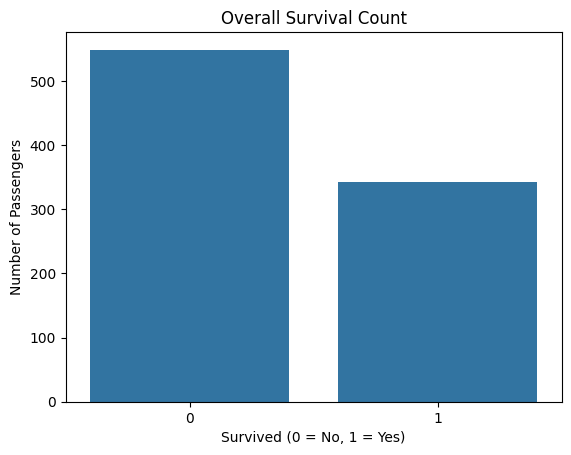

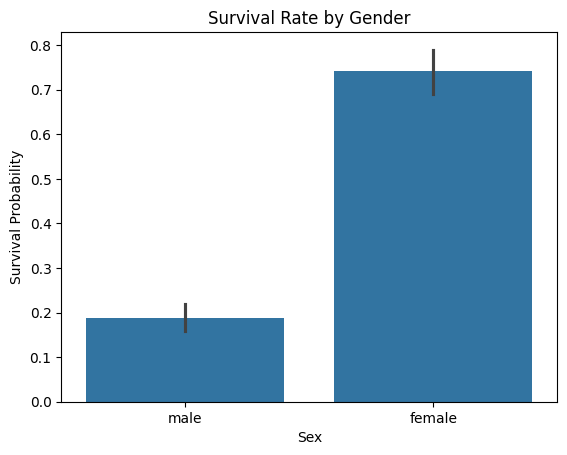

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/ML/data/train.csv")

print(df.shape)
df.head()
df.info()
df.describe()
df.isnull().sum()

# df.hist(figsize=(12, 8))
# plt.suptitle("Numerical Feature Distributions", fontsize=16)
# plt.show()

# categorical_cols = df.select_dtypes(include="object").columns
# for col in categorical_cols:
#     sns.countplot(x=col, data=df)
#     plt.title(f"Countplot of {col}")
#     plt.show()


# # This gives an overview of numeric relationships.
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()


sns.countplot(x='Survived', data=df)
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


# This shows the average survival rate for each gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()


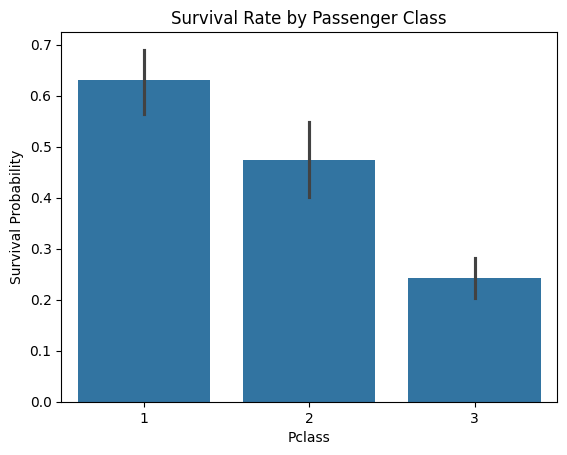

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()

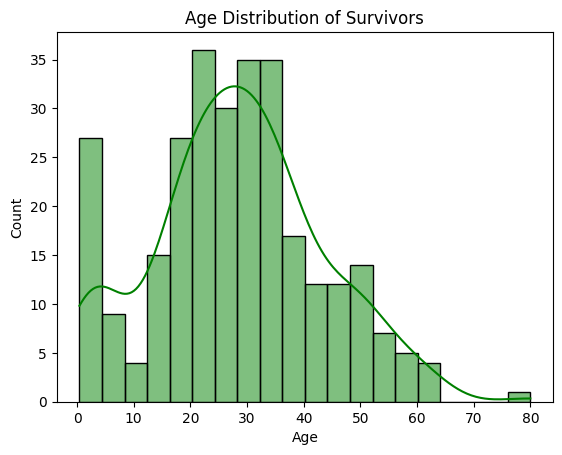

In [13]:
sns.histplot(df[df['Survived']==1]['Age'], bins=20, color='green', kde=True)
plt.title("Age Distribution of Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

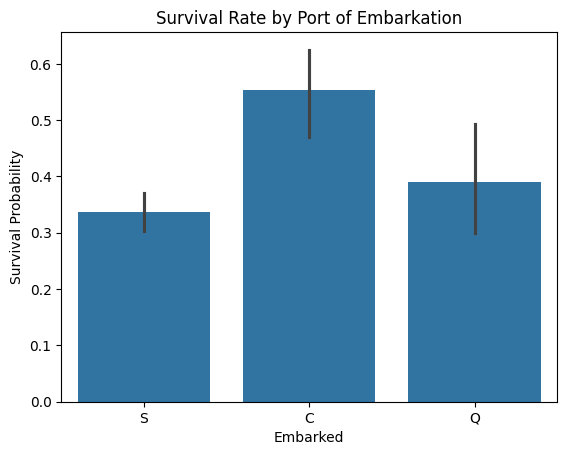

In [14]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.ylabel("Survival Probability")
plt.show()


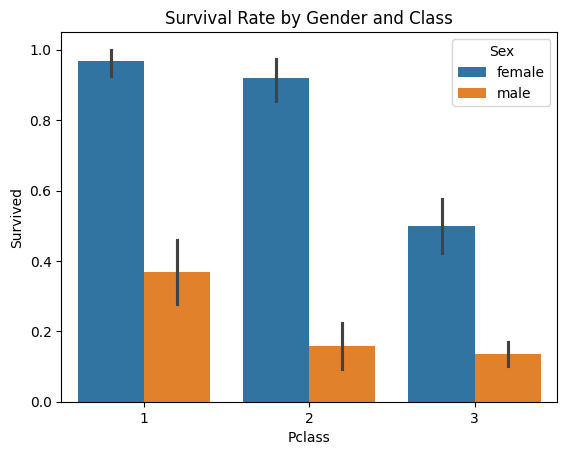

In [15]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Gender and Class")
plt.show()

In [ ]:
# Fill missing Age with median (less sensitive to outliers)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop('Cabin', axis=1, inplace=True)



💡 Observation:
Medium family sizes (2–4) often had higher survival chances, while solo travelers or very large families struggled.

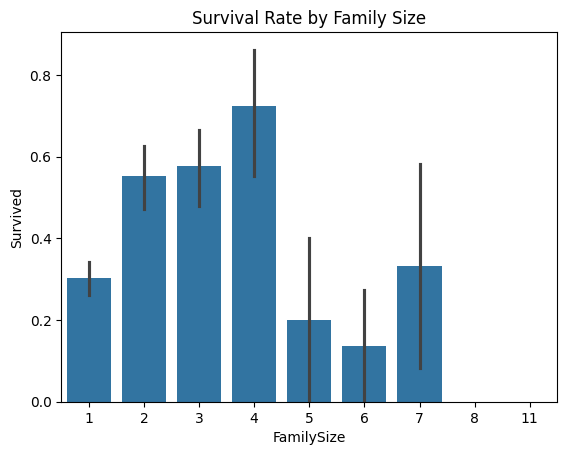

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


💡 Insight:
Passengers traveling alone had much lower survival.

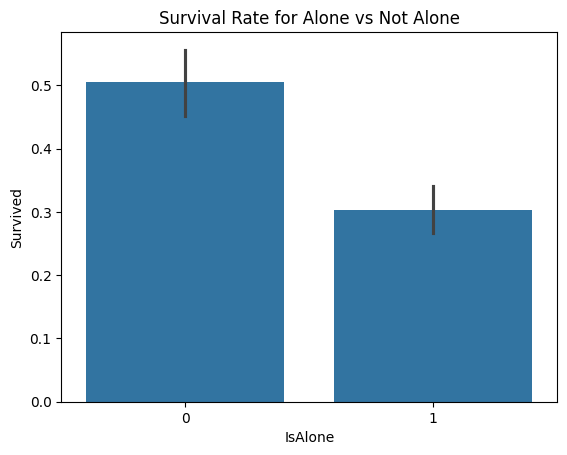

In [20]:
df['IsAlone'] = 1  # default
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title("Survival Rate for Alone vs Not Alone")
plt.show()


💡 Why useful?
Title indicates age, gender, and social status, all of which affect survival.

In [22]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')


<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
C:\Users\gpssi\AppData\Local\Temp\ipykernel_9896\889678315.py:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


💡 Observation:
Children and young adults had higher survival rates; elderly had lower.

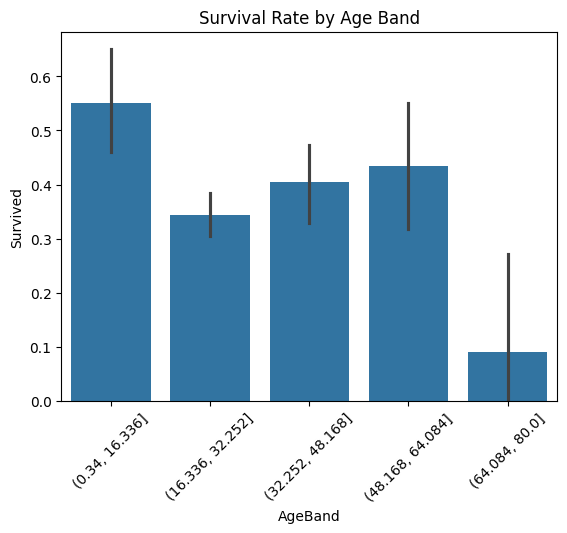

In [24]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df['FareBand'] = pd.qcut(df['Fare'], 4)

sns.barplot(x='AgeBand', y='Survived', data=df)
plt.title("Survival Rate by Age Band")
plt.xticks(rotation=45)
plt.show()


Machine Learning models don’t understand strings.
So we convert them into numbers.

In [26]:
df.replace({'Sex': {'male': 0, 'female': 1},
            'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)


some columns don't help with prediction (like PassengerId, Name, Ticket).

In [27]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [ ]:
# check final data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    int64   
 8   FamilySize  891 non-null    int64   
 9   IsAlone     891 non-null    int64   
 10  Title       891 non-null    int64   
 11  AgeBand     891 non-null    category
 12  FareBand    891 non-null    category
dtypes: category(2), float64(2), int64(9)
memory usage: 78.9 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBand,FareBand
0,0,3,0,22.0,1,0,7.2500,0,2,0,1,"(16.336, 32.252]","(-0.001, 7.91]"
1,1,1,1,38.0,1,0,71.2833,1,2,0,3,"(32.252, 48.168]","(31.0, 512.329]"
2,1,3,1,26.0,0,0,7.9250,0,1,1,2,"(16.336, 32.252]","(7.91, 14.454]"
3,1,1,1,35.0,1,0,53.1000,0,2,0,3,"(32.252, 48.168]","(31.0, 512.329]"
4,0,3,0,35.0,0,0,8.0500,0,1,1,1,"(32.252, 48.168]","(7.91, 14.454]"


In [29]:
df.to_csv("C:/ML/data/train_cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("C:/ML/data/train.csv")

# -- Label Encode 'Sex' (only two categories so it's fine)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# -- One Hot Encode 'Embarked' (unordered)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# -- Optional: Encode 'Pclass' (since it's actually ordered: 1st < 2nd < 3rd)
# But it’s already numeric, so we can keep it as is.

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.to_csv("C:/ML/data/processed_train.csv", index=False)
print("✅ Processed dataset saved successfully!")


✅ Processed dataset saved successfully!


# 🛳️ Titanic Survival Prediction — Exploratory Data Analysis (EDA)

🧾 Key Observations from Titanic Dataset

Dataset Overview:

The dataset contains 891 rows and 12 columns.

Target variable: Survived (1 = Survived, 0 = Did not survive).

The dataset includes both numerical and categorical columns.

Missing Values:

Cabin, Age, and Embarked contain missing data.

Cabin has the highest missing percentage (~77%), followed by Age (~20%) and Embarked (less than 1%).

Demographic Insights:

The majority of passengers were male.

However, females had a significantly higher survival rate than males.

Most passengers were from the 3rd class, which also had the lowest survival rate.

Class & Fare Analysis:

1st class passengers had the highest survival rate.

Fare is positively correlated with survival — passengers who paid higher fares had better chances of surviving.

Age & Embarkation:

Age showed a weak relationship with survival — younger children had slightly better chances.

Most passengers embarked from Southampton (S).

Correlation Summary:

Pclass and Fare are the strongest predictors of survival.

Age shows little correlation with survival.

Sex (converted to numerical later) will be a strong categorical predictor.

✅ Conclusion:
The data suggests that social class, gender, and fare were key factors in determining survival during the Titanic disaster.
Age had some influence, but class and gender were dominant.